In [1]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import colors
import spacy
import pandas as pd
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

In [2]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  
    
for k in totalCount.keys():
    total=totalCount[k]
    neg=negCount[k]
    negCount[k]=neg/total
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
with open('./Master_vocab.pkl','rb') as f:
    vocab=pickle.load(f)
tok2id=vocab['tok2id']
id2tok=vocab['id2tok']
endid=tok2id['e0s']
docs=nlp.pipe(test1['text'])
negtextFreq = []
poslist=[]
for doc in docs:
    countlist=[]
    plist=[]
    for token in doc:
        if(token.is_stop==False and token.is_punct==False):
            countlist.append(negCount[token.text])
            if(token.text!='s0s' and token.text!='e0s'):
                plist.append(token.pos)
            elif(token.text=='s0s'):
                plist.append(70)
            else:
                plist.append(78)
    negtextFreq.append(countlist)
    poslist.append(plist)

for i,r in enumerate(negtextFreq):
    if len(r)<175:
        negtextFreq[i]=(r+([negCount['e0s']]*(175-len(r))))
    else:
        negtextFreq[i]=negtextFreq[i][:175]
for i,r in enumerate(poslist):
    if len(r)<175:
        poslist[i]=(r+([78]*(175-len(r))))
    else:
        poslist[i]=poslist[i][:175]


negtextFreq=np.array(negtextFreq)
poslist=np.array(poslist)
path='/home/dick/RunpodData/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 HPCData Curl BaseCsae
 1 Curl RandMerge min2max3
 2 Curl BaseCase R14   
 3 Curl RandMerge min2Max3
 4 Curl skipCCONJ R17  
 5 Curl MergePROPN R1  
 6 HPC Curl BaseCase   
 7 Curl RandMerge R1   
 8 Curl BaseCase R1    
 9 HPC Curl RandMerge  
10 Val best.pt         
11 Curl MergePROP NewR1
12 BaseCase 256dim R1  
13 Curl MergePROPN R13 
14 Curl MergeNOUN NewR1
15 HPC Curl MergeADJ   
16 RandMerge 256dim min2max2
17 Curl BaseCase R10   
18 Curl RandMerge R11  
19 Curl skipCCONJ R1   
20 Curl MergeADJ R1    


In [130]:
curdataList = glob.glob(f'{path}{run[17]}/val_curldata_*.plk')
curldata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        try:
            tmp=pickle.load(f)
            i=list(tmp.keys())[0]
            try:
                curldata[i]=tmp[i]['LSTM']
            except KeyError:
                curldata[i]=tmp[i]
        except EOFError:
            pass
print(sorted(list(curldata.keys())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [131]:
predictList = glob.glob(f'{path}{run[17]}/EstPred_*.plk')
predict=np.zeros((1000,len(predictList)))
for file in predictList:
    ep=file.split("_")[-1].split(".")[0]
    with open(f'{file}','rb') as f:
        try:
            tmp=pickle.load(f)
            predict[:,int(ep)]=tmp.T
        except EOFError:
            pass

In [119]:
accy=pd.read_csv('./ResultLog/Curl_RandMerge_min2Max3_val.csv')
maxaccy=accy['Accy'].argmax()
print(f'Accy:{accy.loc[maxaccy]["Accy"]} , epoch:{maxaccy}')
epoch=maxaccy
keys=list(curldata[epoch]['forward'].keys())
#keys=list(curldata[epoch]['forward'].keys())
print(keys)

Accy:0.612 , epoch:545
[0, 25, 50, 75, 100, 125, 150]


In [120]:
#samplesize=min(len(negidx),len(posidx))
samplesize=100
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
#epoch_in=curldata[epoch]['LSTM'][direction][0][:,:25,:]
#epoch_curl=curldata[epoch]['LSTM'][direction][0][:,25:50,:]
#epoch_div=curldata[epoch]['LSTM'][direction][0][:,50:,:]

#predict_in=curldata[epoch]['Predict'][direction][0][:,:25,:]
#predict_curl=curldata[epoch]['Predict'][direction][0][:,25:50,:]
#predict_div=curldata[epoch]['Predict'][direction][0][:,50:,:]

epoch_in=curldata[epoch][direction][0][:,:25,:]
epoch_curl=curldata[epoch][direction][0][:,25:50,:]
epoch_div=curldata[epoch][direction][0][:,50:,:]
for k in range(1,len(keys)):
    #epoch_in = np.hstack((epoch_in,curldata[epoch]['LSTM'][direction][keys[k]][:,:25,:]))
    #epoch_curl = np.hstack((epoch_curl,curldata[epoch]['LSTM'][direction][keys[k]][:,25:50,:]))
    #epoch_div = np.hstack((epoch_curl,curldata[epoch]['LSTM'][direction][keys[k]][:,50:,:]))
    #predict_in = np.hstack((predict_in,curldata[epoch]['Predict'][direction][keys[k]][:,:25,:]))
    #predict_curl = np.hstack((predict_curl,curldata[epoch]['Predict'][direction][keys[k]][:,25:50,:]))
    #predict_div = np.hstack((predict_curl,curldata[epoch]['Predict'][direction][keys[k]][:,50:,:]))

    epoch_in = np.hstack((epoch_in,curldata[epoch][direction][keys[k]][:,:25,:]))
    epoch_curl = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,25:50,:]))
    poch_div = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,50:,:]))
    
in_l=np.linalg.norm(epoch_in,axis=-1)
epoch_in_unit = epoch_in/ in_l.reshape(1000,175,1)
curl_l=np.linalg.norm(epoch_curl,axis=-1)
epoch_curl_unit = epoch_curl/ curl_l.reshape(1000,175,1)

#in_l=np.linalg.norm(predict_in,axis=-1)
#predict_in_unit = predict_in/ in_l.reshape(1000,175,1)
#predict_curl_l=np.linalg.norm(predict_curl,axis=-1)
#predict_curl_unit = predict_curl/ predict_curl_l.reshape(1000,175,1)

100


In [75]:
#norm = Normalize()
#negcolormap = cm.tab20
## POS Color Map
#norm = colors.BoundaryNorm(np.arange(84,104), negcolormap.N)
#norm.autoscale(poslist)
#nco=negcolormap(norm(poslist))
#r,c=np.where((poslist==70)|(poslist==78))
#nco[r,c,-1]=0
#r,c=np.where(poslist!=92)
#nco[r,c,-1]=0

# Relative Position
#co=np.arange(0,100)
#norm.autoscale(co)
#nco=negcolormap(norm(co))

#
# Positive Negative Sentiment
#co=np.zeros((1000,175))
#co[posidx,:]=1
#norm.autoscale(co)
#nco=negcolormap(norm(co))

# Prediction in Sentiment
#co=predict[:,epoch]
#co=np.where(co>0.095,1,co)
#co=np.where(co<0.05,0,co)
#norm.autoscale(co)
#nco=negcolormap(norm(co))


# Error in Sentiment
#co=predict[:,epoch]
#co=np.where(co>0.095,1,co)
#co=np.where(co<0.05,0,co)
#co=(test1['label']!=co).astype(int)
#norm.autoscale(co)
#nco=negcolormap(norm(co))

# Negative Text Frequence
#norm.autoscale(negtextFreq)
#nco=negcolormap(norm(negtextFreq))

# Curl Length
#norm.autoscale(curl_l)
#nco=negcolormap(norm(curl_l))
#r,c=np.where(curl_l<5)
#nco[r,c,-1]=0
sample=epoch_in_unit[:]
sample_curl=epoch_curl_unit[:]

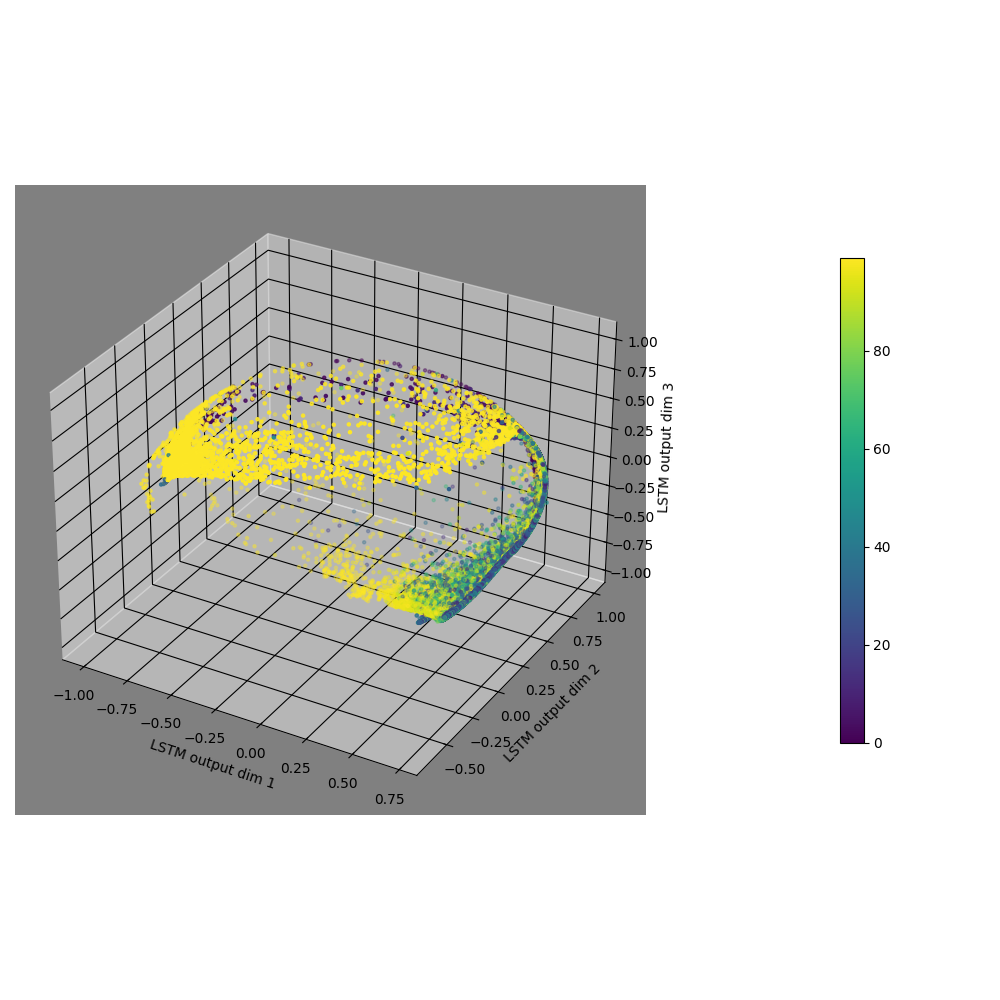

In [129]:
start,stop=0,175
plt.close('all')
plt.rcParams['grid.color'] = "black"
curlfig=plt.figure(figsize=(10,10))

norm = Normalize()
negcolormap = cm.viridis
# Relative Position
co=np.arange(0,100)
norm.autoscale(co)
nco=negcolormap(norm(co))

prediction=predict[:,epoch]
prediction=np.where(prediction>0.95,1,prediction)
prediction=np.where(prediction<0.05,0,prediction)
sample = epoch_in_unit[:]
sample_curl=epoch_curl_unit[:]
curlax=curlfig.add_subplot(projection='3d')
#nco1=nco[np.where(prediction==1)]
for i in range(start,stop):
    keep=np.ceil((i/test1.loc[:]['length'])*100)
    keep=np.where(keep>=100,99,keep).astype(int)
    p = [ int(k) for k in keep  if(k!=-1) ]
    keep=np.where(keep!=-1)[0]
    curlax.scatter(sample[:,i:i+1,0], sample[:,i:i+1,1], sample[:,i:i+1,2],
                s=5,c=nco[p])
    #curlax2.scatter(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #             s=1,c=nco2[keep,i:i+1])
    #curlax.quiver(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #              sample_curl[keep,i:i+1,0],sample_curl[keep,i:i+1,1], sample_curl[keep,i:i+1,2] ,
    #             length=0.05, normalize=True,color=nco[p])
    
    #curlax.scatter3D(sample[:,i:i+1,0], sample[:,i:i+1,1], sample[:,i:i+1,2],c=nco[:,i:i+1],s=5)
curlax.set_xlabel('LSTM output dim 1')
curlax.set_ylabel('LSTM output dim 2')
curlax.set_zlabel('LSTM output dim 3')
    
curlax.set_facecolor('gray')
sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=curlfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
#curlax.view_init(elev=40, azim=-45)
#cbar.set_label('Relative Position')
#curlax.set_title(f"BaseCase(R10) LSTM output Epoch {epoch}: Accy {accy.loc[epoch]['Accy']}\n ValidationSet (1000 Samples) ColorMap=Relative Position")
plt.tight_layout()
#plt.savefig('./BaseCaseR1_RelativePosition.png',dpi=600)
plt.show()


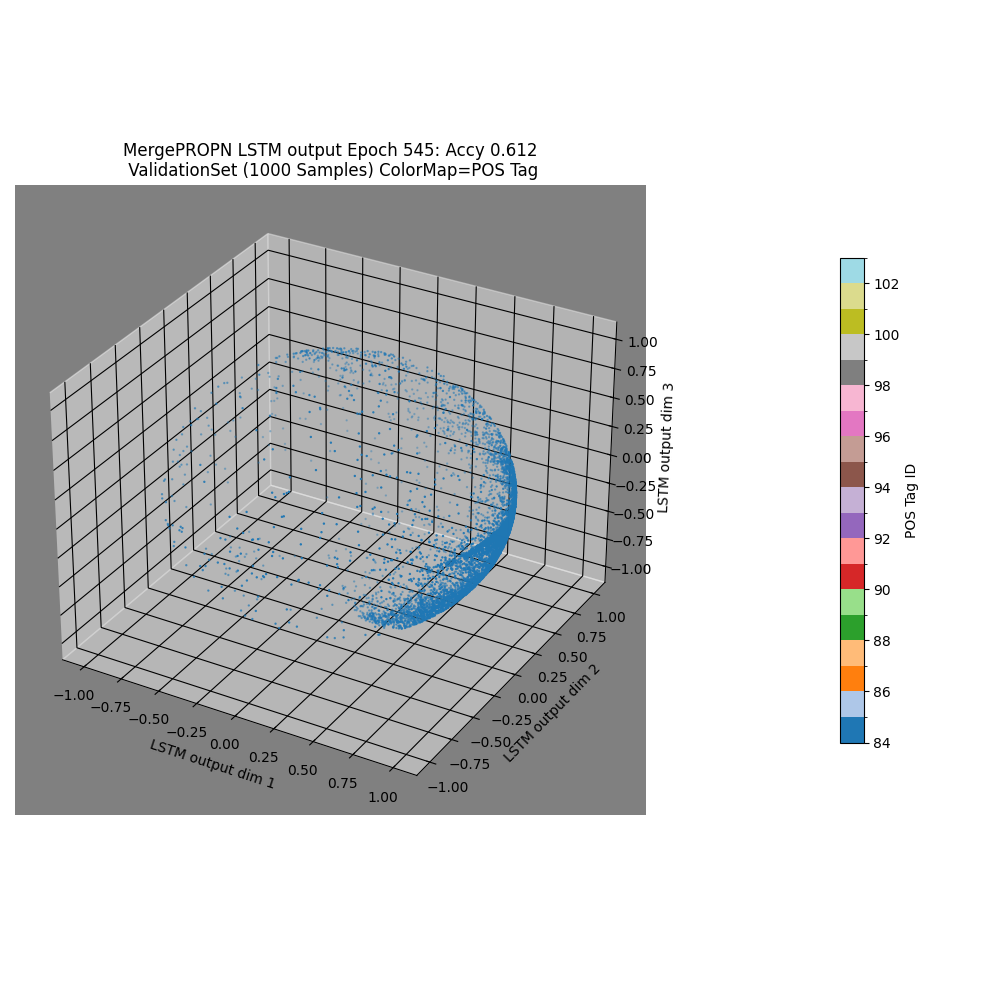

In [103]:
plt.close('all')
plt.rcParams['grid.color'] = "black"
divfig=plt.figure(figsize=(10,10))
norm = Normalize()
negcolormap = cm.tab20
## POS Color Map
norm = colors.BoundaryNorm(np.arange(84,104), negcolormap.N)
norm.autoscale(poslist)
nco=negcolormap(norm(poslist))
r,c=np.where((poslist!=84))
nco[r,c,-1]=0
prediction=predict[:,epoch]
prediction=np.where(prediction>0.95,1,prediction)
prediction=np.where(prediction<0.05,0,prediction)
sample_curl=epoch_curl_unit[np.where(prediction==0)]
nco1=nco[np.where(prediction==0)]
curlax=divfig.add_subplot(projection='3d')
curlax.set_facecolor('gray')
for i in range(0,stop):
    keep=np.ceil(i/test1.loc[np.where(prediction==0)]['length']*100)
    keep=np.where(keep>=100,-1,keep)
    p = [ int(k) for k in keep ] #if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter3D(sample_curl[:,i:i+1,0], sample_curl[:,i:i+1,1],sample_curl[:,i:i+1,2],s=0.5,c=nco1[:,i:i+1])
curlax.set_xlabel('LSTM output dim 1')
curlax.set_ylabel('LSTM output dim 2')
curlax.set_zlabel('LSTM output dim 3')
#sm = plt.cm.ScalarMappable(cmap=cm.bwr, norm=norm)

sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=divfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
cbar.set_label('POS Tag ID')
curlax.set_title(f"MergePROPN LSTM output Epoch {epoch}: Accy {accy.loc[epoch]['Accy']}\n ValidationSet (1000 Samples) ColorMap=POS Tag")
plt.tight_layout()
plt.show()

In [46]:
nco[np.where(poslist==84)]


array([[0.41229, 0.99268, 0.39826, 1.     ],
       [0.41229, 0.99268, 0.39826, 1.     ],
       [0.41229, 0.99268, 0.39826, 1.     ],
       ...,
       [0.41229, 0.99268, 0.39826, 1.     ],
       [0.41229, 0.99268, 0.39826, 1.     ],
       [0.41229, 0.99268, 0.39826, 1.     ]])

In [ ]:
for pos_ in list(posaccounting.keys()):
    print(f'{pos_} : {np.mean(posaccounting[pos_])}')

In [ ]:
accy['Accy'].argmax()

In [ ]:
accy.loc[723]

In [ ]:
test1[(test1['label']==0) & (test1['length']==100)].index

In [ ]:
r,c=np.where(negtextFreq[negidx]<0.4)

In [ ]:
plt.hist(poslist[negidx][r,c])
plt.show()

In [ ]:
d=np.stack((avgADJCurl,avgVerbCurl,avgNounCurl))

In [169]:
prediction=predict[:,epoch]
prediction=np.where(prediction>0.95,1,prediction)
prediction=np.where(prediction<0.05,0,prediction)
sample_curl=epoch_curl_unit[np.where(prediction==0)]
start,stop=0,175
curldiff=[]
for i in range(start,stop-1):
    curldiff.append(sample_curl[:,i+1,:]-sample_curl[:,i,:])

In [170]:
curldiff=np.array(curldiff)
print(curldiff.shape)
curldiff=np.moveaxis(curldiff,0,1)
print(curldiff.shape)
#g=np.linalg.norm(curldiff,axis=-1)
#curldiff=curldiff/g.reshape(sample_curl.shape[0],174,1)

(174, 442, 3)
(442, 174, 3)


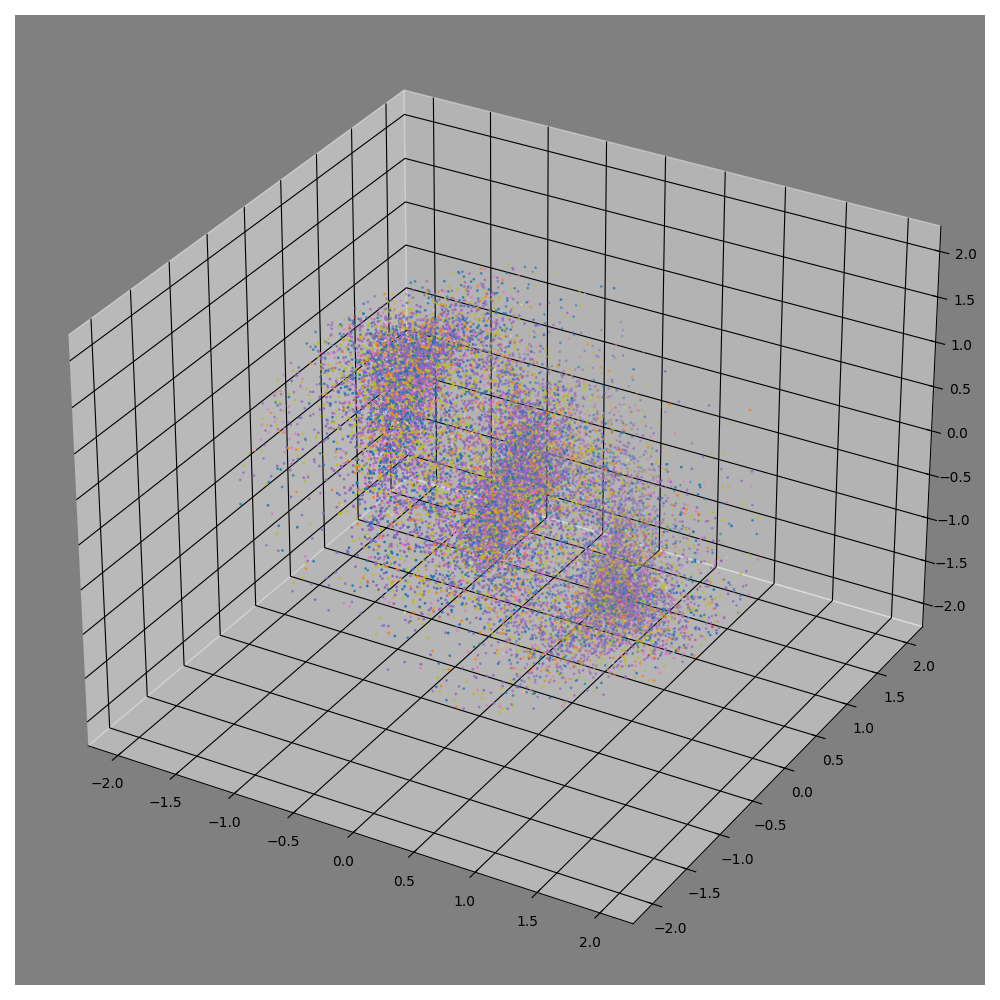

In [171]:
norm = Normalize()
negcolormap = cm.tab20
# POS Color Map
norm = colors.BoundaryNorm(np.arange(84,104), negcolormap.N)
norm.autoscale(poslist)
nco=negcolormap(norm(poslist))
#nco2=nco.copy()
r,c=np.where((poslist==70)|(poslist==78))
nco[r,c,-1]=0
#r,c=np.where((poslist==100)|(poslist==92)|(poslist==84)|(poslist==70)|(poslist==78)|(poslist==89))
#nco2[r,c,-1]=0
             
divfig=plt.figure(figsize=(10,10))
curlax=divfig.add_subplot(projection='3d')
#curlax2=divfig.add_subplot(1,2,2,projection='3d')
curlax.set_facecolor('gray')
#curlax2.set_facecolor('gray')

curldiffN=curldiff[:]
for i in range(0,174):
    keep=np.ceil((i/test1.loc[np.where(prediction==0)]['length'])*100)
    keep=np.where(keep>=100,-1,keep).astype(int)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter3D(curldiffN[keep,i:i+1,0], curldiffN[keep,i:i+1,1],curldiffN[keep,i:i+1,2],s=1,c=nco[keep,i+1:i+2])
    #curlax2.scatter3D(curldiffN[keep,i:i+1,0], curldiffN[keep,i:i+1,1],curldiffN[keep,i:i+1,2],s=0.5,c=nco2[keep,i+1:i+2])
#sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
#cbar=plt.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
plt.tight_layout()
plt.show()

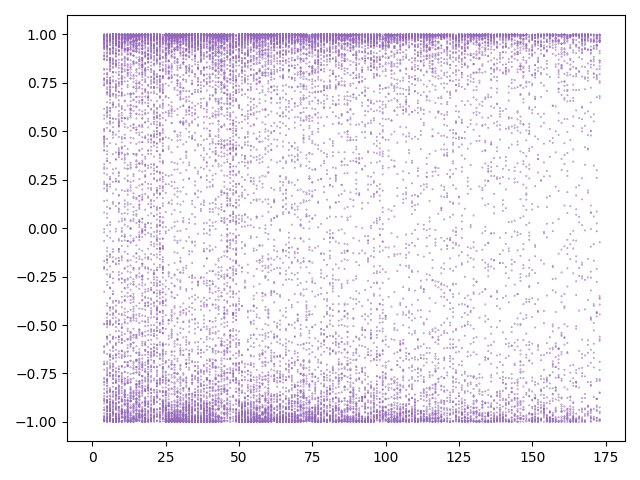

In [103]:
norm = Normalize()
negcolormap = cm.tab20
# POS Color Map
norm = colors.BoundaryNorm(np.arange(84,104), negcolormap.N)
norm.autoscale(poslist)
nco=negcolormap(norm(poslist))
#nco2=nco.copy()
r,c=np.where((poslist!=92))
nco[r,c,-1]=0
nco=nco[np.where(prediction==0)]
curldiffN=curldiff[:]
for i in range(0,174):
    keep=np.ceil((i/test1.loc[np.where(prediction==0)]['length'])*100)
    keep=np.where(keep>=100,-1,keep).astype(int)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    plt.scatter(np.full((keep.shape),i), curldiffN[keep,i:i+1].reshape(-1,),c=nco[keep,i+1:i+2],s=0.1)
    #curlax2.scatter3D(curldiffN[keep,i:i+1,0], curldiffN[keep,i:i+1,1],curldiffN[keep,i:i+1,2],s=0.5,c=nco2[keep,i+1:i+2])
#sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
#cbar=plt.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
plt.tight_layout()
plt.show()

In [88]:
curldiff.shape

(442, 174)